In [1]:
# импортируем библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# загружаем файл:
data = pd.read_csv('train.csv')
# выводим первые 5 строк:
data.head()

,index,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,target
0,0,0.001377,-0.312330,3.830221,0.166320,-1.224697,0.429649,1.298595,0.075777,-0.305407,...,-3.978286,0.734183,-0.065436,0.184826,-6.191027,-1.641520,-0.595980,0.302194,-1.016487,-1.545864
1,1,0.013704,-0.027573,1.005470,0.210619,0.127280,-0.132307,0.339098,-0.055844,0.021325,...,0.707780,0.010771,0.010401,-0.089216,-0.859887,-0.442245,-0.031124,0.028088,-0.146129,-10.972976
2,2,0.052899,-0.187180,2.051134,0.114417,0.087221,-0.114951,1.411995,-0.103319,-0.237249,...,-2.085095,0.404859,0.016389,0.008621,-2.502265,-0.689139,-0.424500,-0.127823,-0.609472,-1.342009
3,3,-0.106739,0.048862,0.606170,0.064275,0.360796,0.030926,-0.393131,0.016244,-0.017229,...,-0.285642,0.048705,-0.001868,-0.050163,-0.366623,-0.003307,-0.071816,-0.000375,-0.046915,-1.244498
4,4,0.041890,0.121760,-0.684213,0.155978,0.542228,-0.204201,-0.143448,-0.039893,0.134491,...,2.198981,-0.123793,0.032411,-0.067868,1.991105,0.455984,0.246094,-0.147255,0.382327,1.686629


In [3]:
# объясняющие переменные:
x = data.drop(['index', 'target'], axis=1)
# зависимые переменные:
y = data['target']

## МНК

МНК в матричной форме:

$$Y = XB + E$$
$$\hat{Y} = X\hat{B} + \hat{E}$$
откуда:
$$\hat{B} = (X^T X)^{-1} \cdot X^T Y$$

In [4]:
# значения зависимой переменной в матричной форме:
Y = np.array(y).reshape(-1, 1)
# значения объясняющих переменных переменных в матричной форме:
X = np.concatenate([np.ones((x.shape[0], 1)), np.array(x).reshape(-1, x.shape[1])], axis=1)

*Примечание:*
Первый столбец матрицы *X*, состоящий только из 1-ек, отражает **свободный член**.

In [5]:
# вычисление параметров линейной регрессии:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [6]:
# вычисление предсказанных значений зависимой переменной:
Yp = X @ B

In [7]:
# R^2 и MSE:
print(f"R^2: {r2_score(Y, Yp)}")
print(f"MSE: {mean_squared_error(Y, Yp)}")

R^2: -3.3187606442521407
MSE: 188.85126784806096


Как видим, коэффициент детерминации получился отрицательным, что говорит нам об **очень слабом** объяснении вариации зависимой переменной вариацией объясняющих переменных. MSE тоже имеет чересчур большое значение относительно значений независимых переменных.

Попробуем выявить *«лишние»* объясняющие переменные с помощью корреляционной матрицы. Вычислим модуль коэффициента корреляции для каждой из пар объясняющих переменных, для каждой переменной подсчитаем число коррелирующих с ней переменных и отсортируем их по убыванию: 

In [8]:
# корреляционная матрица (модули коэффициентов корреляции):
corr_matrix = x.corr('spearman').abs()
# считаем число коррелирующих переменных для каждой объясняющей переменной: 
multicor = (corr_matrix >= 0.7).sum() - 1
# сортируем по убыванию и выводим: 
multicor.sort_values(ascending=False)

x_9     25
x_2     24
x_51    24
x_1     24
x_50    24
x_46    24
x_54    23
x_17    23
x_38    23
x_37    23
x_36    23
x_31    23
x_24    23
x_21    23
x_40    23
x_47    23
x_20    23
x_13    23
x_12    23
x_52    23
x_10    23
x_8     23
x_6     23
x_29    22
x_5      6
x_45     5
x_25     4
x_30     4
x_16     3
x_43     3
x_3      3
x_34     3
x_28     3
x_49     3
x_23     3
x_22     3
x_14     3
x_39     3
x_44     2
x_41     2
x_27     2
x_26     2
x_18     2
x_11     2
x_7      2
x_4      2
x_33     1
x_48     1
x_53     1
x_35     0
x_42     0
x_32     0
x_19     0
x_15     0
x_0      0
dtype: int64

In [9]:
# фиксируем признаки, коррелирующие с более чем 22 другими признаками:
gipermult = multicor.index[multicor >= 22]
# выводим:
gipermult

Index(['x_1', 'x_2', 'x_6', 'x_8', 'x_9', 'x_10', 'x_12', 'x_13', 'x_17',
       'x_20', 'x_21', 'x_24', 'x_29', 'x_31', 'x_36', 'x_37', 'x_38', 'x_40',
       'x_46', 'x_47', 'x_50', 'x_51', 'x_52', 'x_54'],
      dtype='object')

<Axes: >

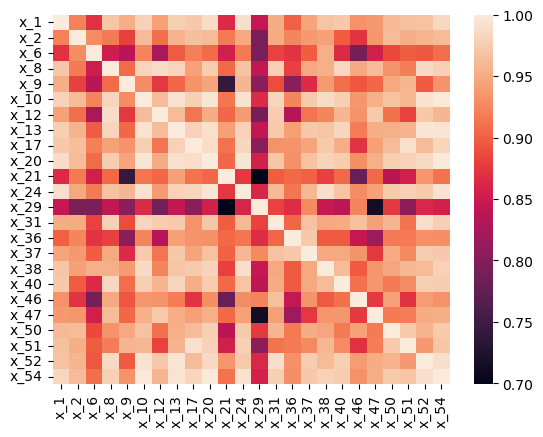

In [10]:
# тепловая карта корреляционной матрицы:
sns.heatmap(corr_matrix.loc[gipermult, gipermult])

Невероятно, но все отобранные нами признаки коррелируют друг с другом (шкала справа начинается с 0.7). Поэтому из них следует оставить только один, сильнее других коррелирующий с зависимой переменной:

In [11]:
# частные коэффициенты корреляции для каждой из рассматриваемых объясняющих переменных:
pd.concat([x[gipermult], y], axis=1).corr('spearman')['target'].abs().sort_values(ascending=False)

target    1.000000
x_9       0.119846
x_40      0.119442
x_38      0.111057
x_8       0.110069
x_24      0.106322
x_47      0.103443
x_1       0.102587
x_12      0.101715
x_10      0.092961
x_20      0.091939
x_54      0.088257
x_46      0.087505
x_13      0.085694
x_17      0.081639
x_51      0.077765
x_31      0.073575
x_52      0.073339
x_37      0.067883
x_29      0.064630
x_50      0.059894
x_6       0.048005
x_21      0.044232
x_2       0.035775
x_36      0.029978
Name: target, dtype: float64

Таким образом, остается признак <code>'x_9'</code>. Остальные удаляем:

In [12]:
# удаляем ненужные признаки:
x = x.drop(gipermult.drop('x_9'), axis=1)
# выводим первые 5 строк:
x.head()

,x_0,x_3,x_4,x_5,x_7,x_9,x_11,x_14,x_15,x_16,...,x_35,x_39,x_41,x_42,x_43,x_44,x_45,x_48,x_49,x_53
0,0.001377,0.166320,-1.224697,0.429649,0.075777,-3.623133,-0.185854,-0.095973,-0.067243,0.040850,...,-0.021983,-0.018270,-0.287940,0.003662,0.007515,-0.124534,3.064841,-0.065436,0.184826,0.302194
1,0.013704,0.210619,0.127280,-0.132307,-0.055844,0.199990,-0.151687,-0.095735,-0.159117,-0.013057,...,0.003623,-0.029837,0.030786,0.072569,-1.403944,-0.055483,0.002108,0.010401,-0.089216,0.028088
2,0.052899,0.114417,0.087221,-0.114951,-0.103319,-1.126188,0.046403,0.029560,0.045182,-0.006298,...,0.028521,-0.065539,-0.049050,-0.059835,-0.179663,0.047585,0.193937,0.016389,0.008621,-0.127823
3,-0.106739,0.064275,0.360796,0.030926,0.016244,0.360626,0.007574,0.051975,-0.194500,-0.008540,...,-0.048291,0.034860,0.052516,0.058515,-0.003555,0.008824,0.396231,-0.001868,-0.050163,-0.000375
4,0.041890,0.155978,0.542228,-0.204201,-0.039893,1.511975,-0.183853,-0.009378,-0.093505,0.021302,...,0.004597,-0.062165,0.040589,-0.014576,-0.971540,0.046633,-0.945075,0.032411,-0.067868,-0.147255


In [13]:
# значения зависимой переменной в матричной форме:
Y = np.array(y).reshape(-1, 1)
# значения объясняющих переменных переменных в матричной форме:
X = np.concatenate([np.ones((x.shape[0], 1)), np.array(x).reshape(-1, x.shape[1])], axis=1)

In [14]:
# вычисление параметров линейной регрессии:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [15]:
# вычисление предсказанных значений зависимой переменной:
Yp = X @ B

In [16]:
# R^2 и MSE:
print(f"R^2: {r2_score(Y, Yp)}")
print(f"MSE: {mean_squared_error(Y, Yp)}")

R^2: 0.7069567845145033
MSE: 12.814227816112702


Таким образом, $R^2$ приобрел более адекватное значение, соответствующей **сильной связи** между вариациями зависимой и независимых переменных. В то же время MSE **сократился в 15 раз!**